<img src="https://sites.google.com/a/congresodivulgacion.org/i-congreso-nacional-de-divulgacion-cientifica/_/rsrc/1305953844742/config/fcen.png" height="20%" width="20%" style="float: left;"/> 
    <img src="http://cmscreate.web.cern.ch/sites/cmscreate.web.cern.ch/files/pictures/CMSlogo_color_label_1024_May2014.png" height="20%" width="20%"/>

### Include
Header for the plotter

In [1]:
#include<Plotter.h>

### Creating a object
* first argument is the path to the tree and the name of the tree
* second argument is the lists of branches
* ￼other arguments are number of bins, xmin and xmax

In [2]:
Harry::Plotter p("demo/VLFTree",{"AnaMuons.Pt()","AnaJets.Pt()"},100,0,70);

In [3]:
p.SetVerbose(true);

### Adding files
Method to add directory with the ROOT files
* first argumet are directory path
* second argument are category (Signal, Bkg0, Bkg1, etc..)
* third argument are the weights for the trees in the chain.

In [4]:
p.AddDirectory("../data/Signal","Signal",1);
p.AddDirectory("../data/Bkg0","Bkg0",1);
p.AddDirectory("../data/Bkg1","Bkg1",1);


---------------- HLib  AddDirectory ----------------
 Path = ../data/Signal
 Weight = 1

---------------- HLib  AddFile ----------------
 File = ../data/Signal/WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/WJetsToLNu_HT-200To400_ext2-v1_2017_10_22_20_57/171022_185920/0000/Tree_30.root
 Tree = demo/VLFTree
 Weight = 1
 Entries = 2162

---------------- HLib  AddFile ----------------
 File = ../data/Signal/WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/WJetsToLNu_HT-200To400_ext2-v1_2017_10_22_20_57/171022_185920/0000/Tree_6.root
 Tree = demo/VLFTree
 Weight = 1
 Entries = 2162

---------------- HLib  AddFile ----------------
 File = ../data/Signal/WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/WJetsToLNu_HT-200To400_ext2-v1_2017_10_22_20_57/171022_185920/0000/Tree_22.root
 Tree = demo/VLFTree
 Weight = 1
 Entries = 2162

---------------- HLib  AddFile ----------------
 File = ../data/Signal/WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphM

### Cuts
method to cut values in the chains while histograms are created.  
You can apply multiples cuts passing the string
"AnaMuons.Pt()>2&&AnaMuons.Pt()<20" or using the class
TCut https://root.cern.ch/doc/master/classTCut.html  
<font size="3" color="red">NOTE:</font> cuts must be applied before to get histograms or htacks.

In [5]:
p.SetCut("AnaMuons.Pt()>2");

### Save plots
Method to save plots in PDF files.
* the argument is the directory to save the plots, by default plots

In [6]:
p.SavePdfs("plots");

Info in <TCanvas::Print>: pdf file plots/AnaMuons.Pt.pdf has been created
Info in <TCanvas::Print>: pdf file plots/AnaJets.Pt.pdf has been created


### Plots in HStack
Method to get a map of histograms in THStack objects, the key of the map is the branch name.

In [7]:
auto hplots = p.GetPlots();
TCanvas c;

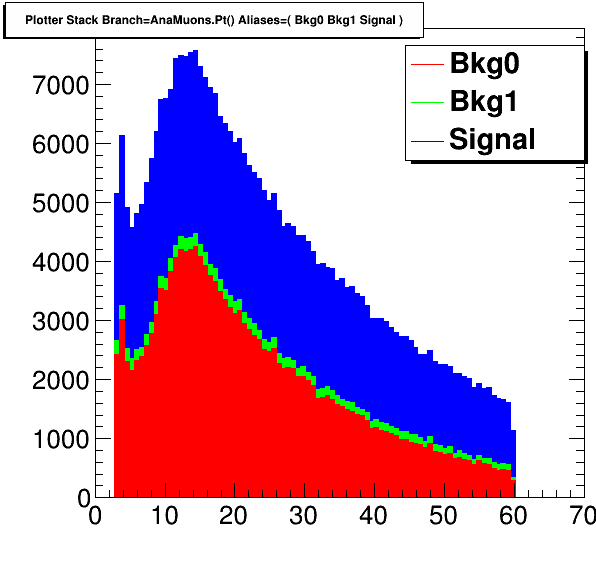

In [8]:
hplots["AnaMuons.Pt()"].first->Draw(); //HStack object
hplots["AnaMuons.Pt()"].second->Draw(); //Legend object
c.Draw();

### Getting and Manipulating  histograms
Method to get the lists of histograms for a given branch.
You can get and manipulate histogram.

In [9]:
auto hists=p.GetHists();

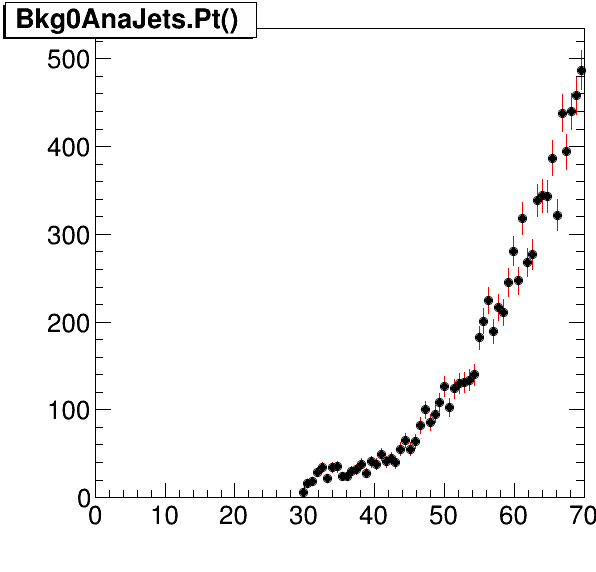

In [10]:
auto h1=hists["AnaJets.Pt()"].first.at(0);
h1->Sumw2();
h1->Draw();
c.Draw();

### Save ROOT File
Method to save all plot information in a ROOT file
* argument is the root file name for the output

In [11]:
p.SaveFile("plotter.root");